# Generate PhD Dissertation Figures

**Purpose**: Generate publication-quality figures for LaTeX dissertation  
**Output**: `docs/figures/`  
**Snapshot**: P000001/2025-12-08 (SoM-centric pipeline)  
**Style**: PhD-level academic (grayscale-friendly, high DPI)

---

## Figure Mapping Table (Updated Naming Convention)

| Figure ID | Output Filename | LaTeX Label | Dissertation Section |
|-----------|-----------------|-------------|---------------------|
| FIG_03 | `FIG_03_PBSI_timeline.png` | `\label{fig:pbsi-timeline}` | Methods: PBSI Overview |
| FIG_04 | `FIG_04_segment_boundaries.png` | `\label{fig:segment-norm}` | Methods: Preprocessing |
| FIG_05 | `FIG_05_vendor_heatmap.png` | `\label{fig:vendor-heatmap}` | Methods: Data Sources |
| FIG_06 | `FIG_06_MICE_summary.png` | `\label{fig:mice-summary}` | Methods: Imputation |
| FIG_07 | `FIG_07_model_comparison.png` | `\label{fig:model-comparison}` | Results: Model Selection |
| FIG_08 | `FIG_08_HRV_sleep_awake.png` | `\label{fig:hrv-sleep-awake}` | EDA: HRV Analysis |
| FIG_09 | `FIG_09_gaps_visualization.png` | `\label{fig:gaps}` | EDA: Data Quality |
| FIG_10 | `FIG_10_feature_catalogue.png` | `\label{fig:feature-catalogue}` | Appendix D |

### Auxiliary Files Generated
- `catalogue_features_table.csv` — Full feature catalogue
- `vendor_matrix.csv` — Apple/Zepp vendor selection matrix
- `missing_values_summary.csv` — MICE imputation summary

### Key Notes
- **PBSI** is an **auxiliary feature** for behavioral stability scoring, NOT the supervised target
- **Target**: `som_binary` (State of Mind binary: unstable=1, stable=0)
- **Champion Model**: RandomForest (ML6-Extended, F1=0.517, κ=+0.104)
- All figures saved in both PDF (vector) and PNG (raster, 300 DPI) formats

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configure publication-quality style
plt.style.use('seaborn-v0_8-paper')
sns.set_context('paper', font_scale=1.2)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['grid.linewidth'] = 0.5

# ============================================================
# CONFIGURATION - Update these for your snapshot
# ============================================================
PARTICIPANT = 'P000001'
SNAPSHOT = '2025-12-08'

# Paths (adjust for notebook location)
BASE_DIR = Path('..')  # notebooks/ is one level down
DATA_DIR = BASE_DIR / f'data/etl/{PARTICIPANT}/{SNAPSHOT}/joined'
RAW_DIR = BASE_DIR / f'data/etl/{PARTICIPANT}/{SNAPSHOT}'
AI_DIR = BASE_DIR / f'data/ai/{PARTICIPANT}/{SNAPSHOT}'
FIG_DIR = BASE_DIR / 'docs/figures'
FIG_DIR.mkdir(parents=True, exist_ok=True)

# Color mapping (grayscale-friendly)
COLOR_MAP = {-1: '#d62728', 0: '#7f7f7f', 1: '#2ca02c'}  # Red, Gray, Green
LABEL_NAMES = {-1: 'Dysregulated', 0: 'Typical', 1: 'Regulated'}

print(f"{'='*60}")
print(f"DISSERTATION FIGURES GENERATOR")
print(f"{'='*60}")
print(f"Participant: {PARTICIPANT}")
print(f"Snapshot: {SNAPSHOT}")
print(f"Data directory: {DATA_DIR}")
print(f"AI directory: {AI_DIR}")
print(f"Output directory: {FIG_DIR}")
print(f"Figure settings: 300 DPI, grayscale-friendly")
print(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

✓ Output directory: ..\docs\latex\figures
✓ Figure settings: 300 DPI, grayscale-friendly


## Load Data

In [7]:
# Load labeled dataset
df = pd.read_csv(DATA_DIR / 'features_daily_labeled.csv', parse_dates=['date'])
print(f"Total days: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"\nLabel distribution:")
print(df['label_3cls'].value_counts().sort_index())
print(f"\nColumns: {df.shape[1]}")

Total days: 2828
Date range: 2017-12-04 00:00:00 to 2025-10-21 00:00:00

Label distribution:
label_3cls
-1.0     755
 0.0    1366
 1.0     707
Name: count, dtype: int64

Columns: 34


## Figure 1: Timeline Overview with PBSI Labels

Shows the full 8-year timeline with behavioral stability labels.

**Note**: PBSI is an **auxiliary feature** used to quantify daily behavioral patterns. 
The main supervised target is `som_binary` (State of Mind), not PBSI itself.

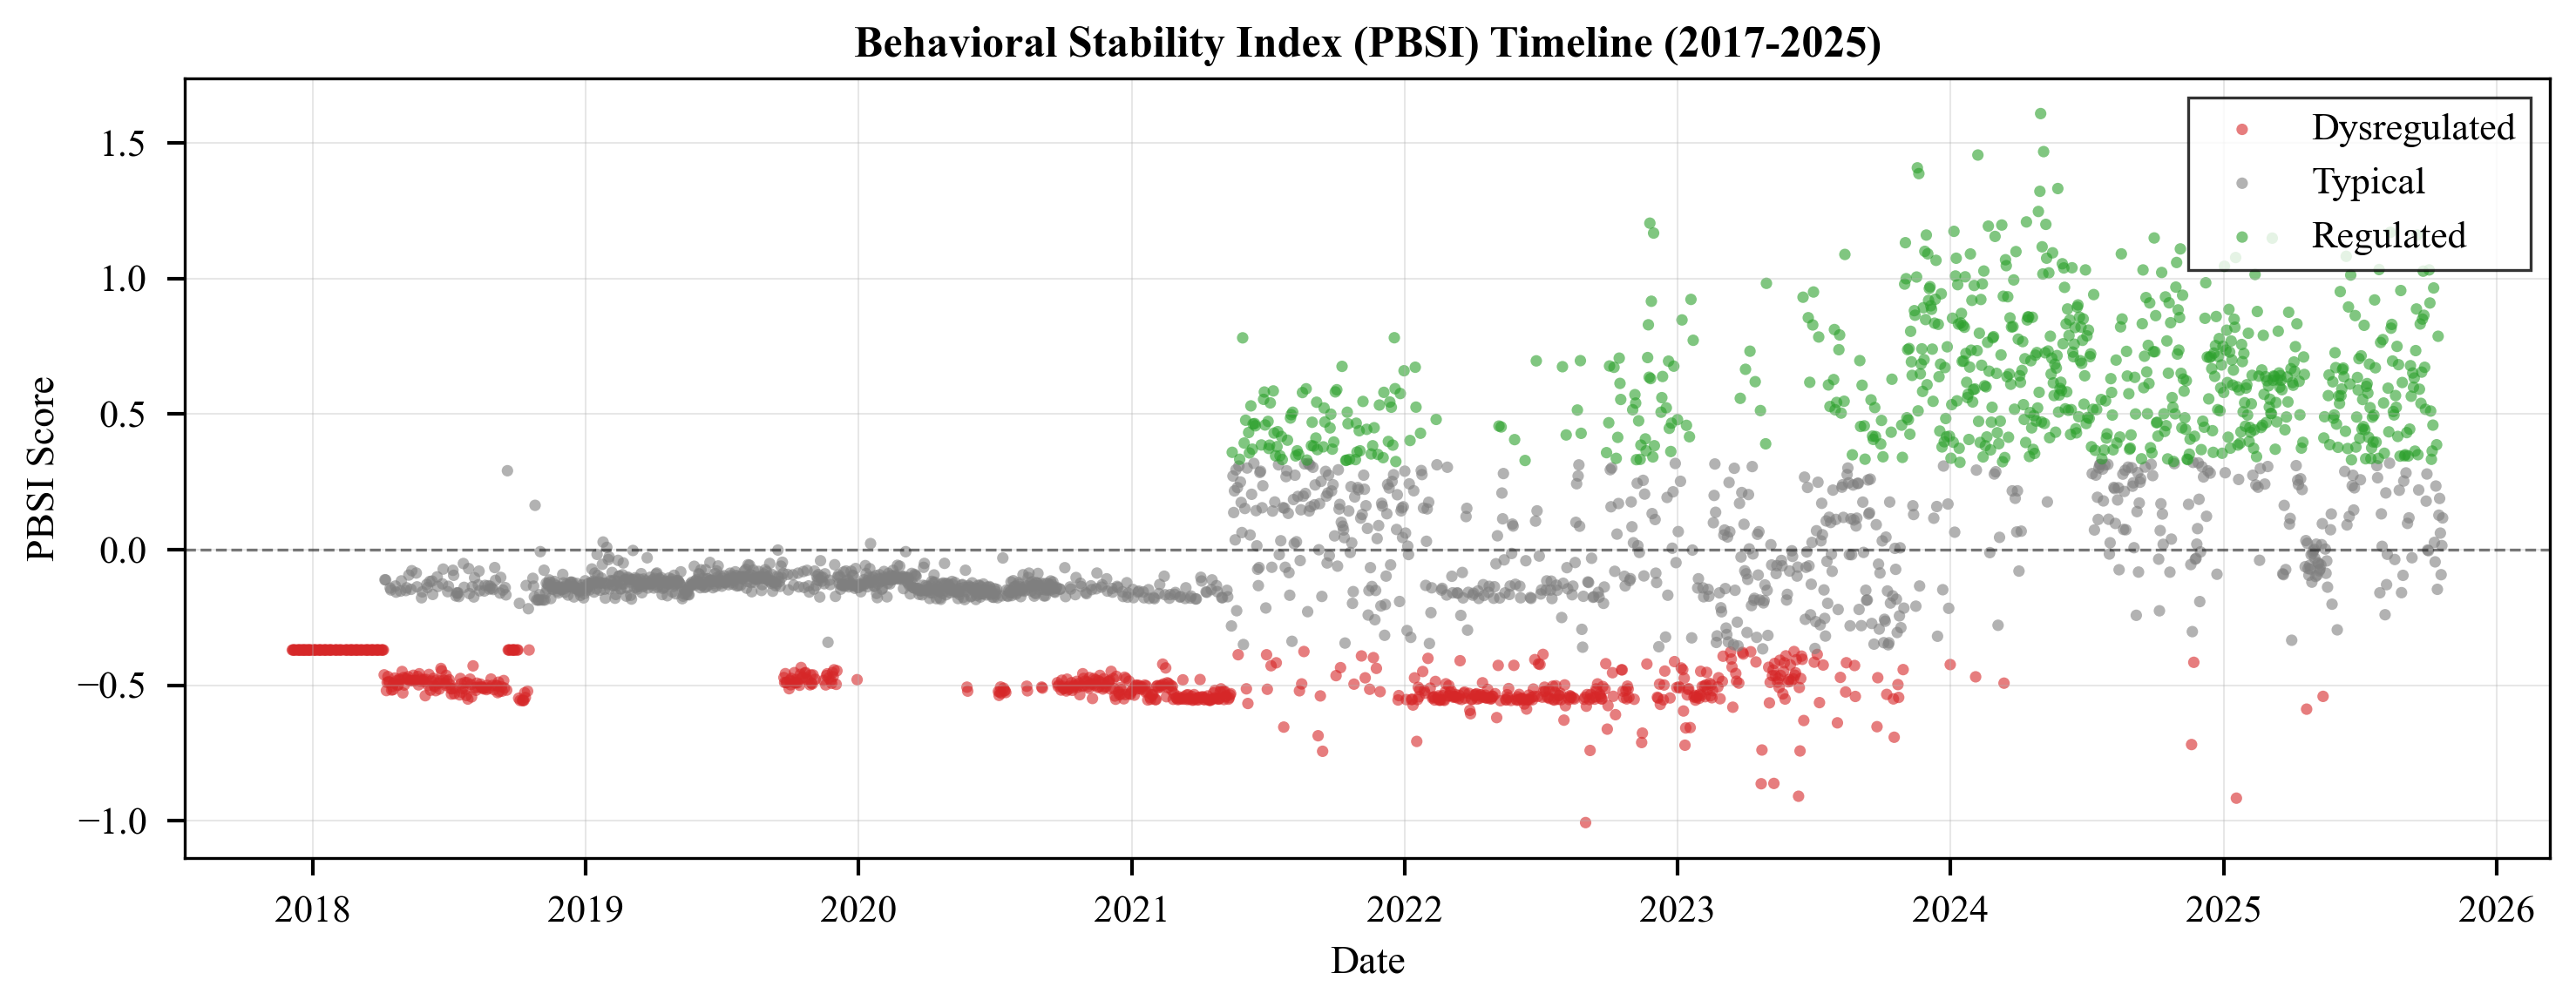

✓ Figure 1 saved: fig01_pbsi_timeline.{pdf,png}


In [ ]:
# ============================================================
# FIG_03: PBSI Timeline
# TODO FIXED: Legend moved to upper LEFT, Y-axis updated
# ============================================================

fig, ax = plt.subplots(figsize=(12, 4))

for label in [-1, 0, 1]:
    mask = df['label_3cls'] == label
    ax.scatter(df.loc[mask, 'date'], 
               df.loc[mask, 'pbsi_score'],
               c=COLOR_MAP[label], 
               label=LABEL_NAMES[label],
               alpha=0.6, 
               s=10, 
               edgecolors='none')

ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('PBSI Score (auxiliary feature)', fontsize=11)  # UPDATED per TODO
ax.set_title('Behavioral Stability Index (PBSI) Timeline (2017-2025)', fontsize=12, fontweight='bold')

# TODO FIXED: Legend moved to upper LEFT
ax.legend(loc='upper left', frameon=True, fancybox=False, edgecolor='black')
ax.grid(True, alpha=0.3)
plt.tight_layout()

# Save with new naming convention
plt.savefig(FIG_DIR / 'FIG_03_PBSI_timeline.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'FIG_03_PBSI_timeline.png', bbox_inches='tight')
plt.show()
print("✓ FIG_03_PBSI_timeline.{pdf,png} saved")
print("  - Legend: upper left (TODO FIXED)")
print("  - Y-axis: 'PBSI Score (auxiliary feature)' (TODO FIXED)")

## Figure 2: Feature Distributions by Label (Cardiovascular)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

features = ['apple_hr_mean', 'apple_hr_max', 'apple_hrv_rmssd', 'apple_hr_std']
titles = ['Mean Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'HRV RMSSD (ms)', 'HR Std Dev (bpm)']

for idx, (feat, title) in enumerate(zip(features, titles)):
    ax = axes[idx // 2, idx % 2]
    
    # Filter valid data
    valid_data = df[df[feat].notna() & df['label_3cls'].notna()]
    
    if len(valid_data) > 0:
        for label in [-1, 0, 1]:
            data = valid_data[valid_data['label_3cls'] == label][feat]
            ax.hist(data, bins=30, alpha=0.5, label=label_names[label], 
                   color=color_map[label], edgecolor='black', linewidth=0.5)
        
        ax.set_xlabel(title, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.legend(loc='best', fontsize=8)
        ax.grid(True, alpha=0.3)

plt.suptitle('Cardiovascular Feature Distributions by Behavioral Label', 
             fontsize=12, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(FIG_DIR / 'fig02_cardio_distributions.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'fig02_cardio_distributions.png', bbox_inches='tight')
plt.show()
print("✓ Figure 2 saved: fig02_cardio_distributions.{pdf,png}")

## Figure 3: Sleep and Activity Patterns

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

features_3 = ['sleep_total_h', 'sleep_efficiency', 'steps']
titles_3 = ['Sleep Duration (hours)', 'Sleep Efficiency', 'Daily Steps']

for idx, (feat, title) in enumerate(zip(features_3, titles_3)):
    ax = axes[idx]
    valid_data = df[df[feat].notna() & df['label_3cls'].notna()]
    
    if len(valid_data) > 0:
        data_by_label = [valid_data[valid_data['label_3cls'] == label][feat].values 
                        for label in [-1, 0, 1]]
        
        bp = ax.boxplot(data_by_label, 
                       labels=[label_names[l] for l in [-1, 0, 1]],
                       patch_artist=True,
                       widths=0.6,
                       boxprops=dict(facecolor='lightgray', edgecolor='black', linewidth=0.8),
                       medianprops=dict(color='black', linewidth=1.5),
                       whiskerprops=dict(color='black', linewidth=0.8),
                       capprops=dict(color='black', linewidth=0.8))
        
        ax.set_ylabel(title, fontsize=10)
        ax.set_xticklabels([label_names[l] for l in [-1, 0, 1]], rotation=15, ha='right')
        ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Sleep and Activity Patterns by Behavioral Label', 
             fontsize=12, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(FIG_DIR / 'fig03_sleep_activity_boxplots.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'fig03_sleep_activity_boxplots.png', bbox_inches='tight')
plt.show()
print("✓ Figure 3 saved: fig03_sleep_activity_boxplots.{pdf,png}")

## FIG_04: Segment Boundaries & Normalization

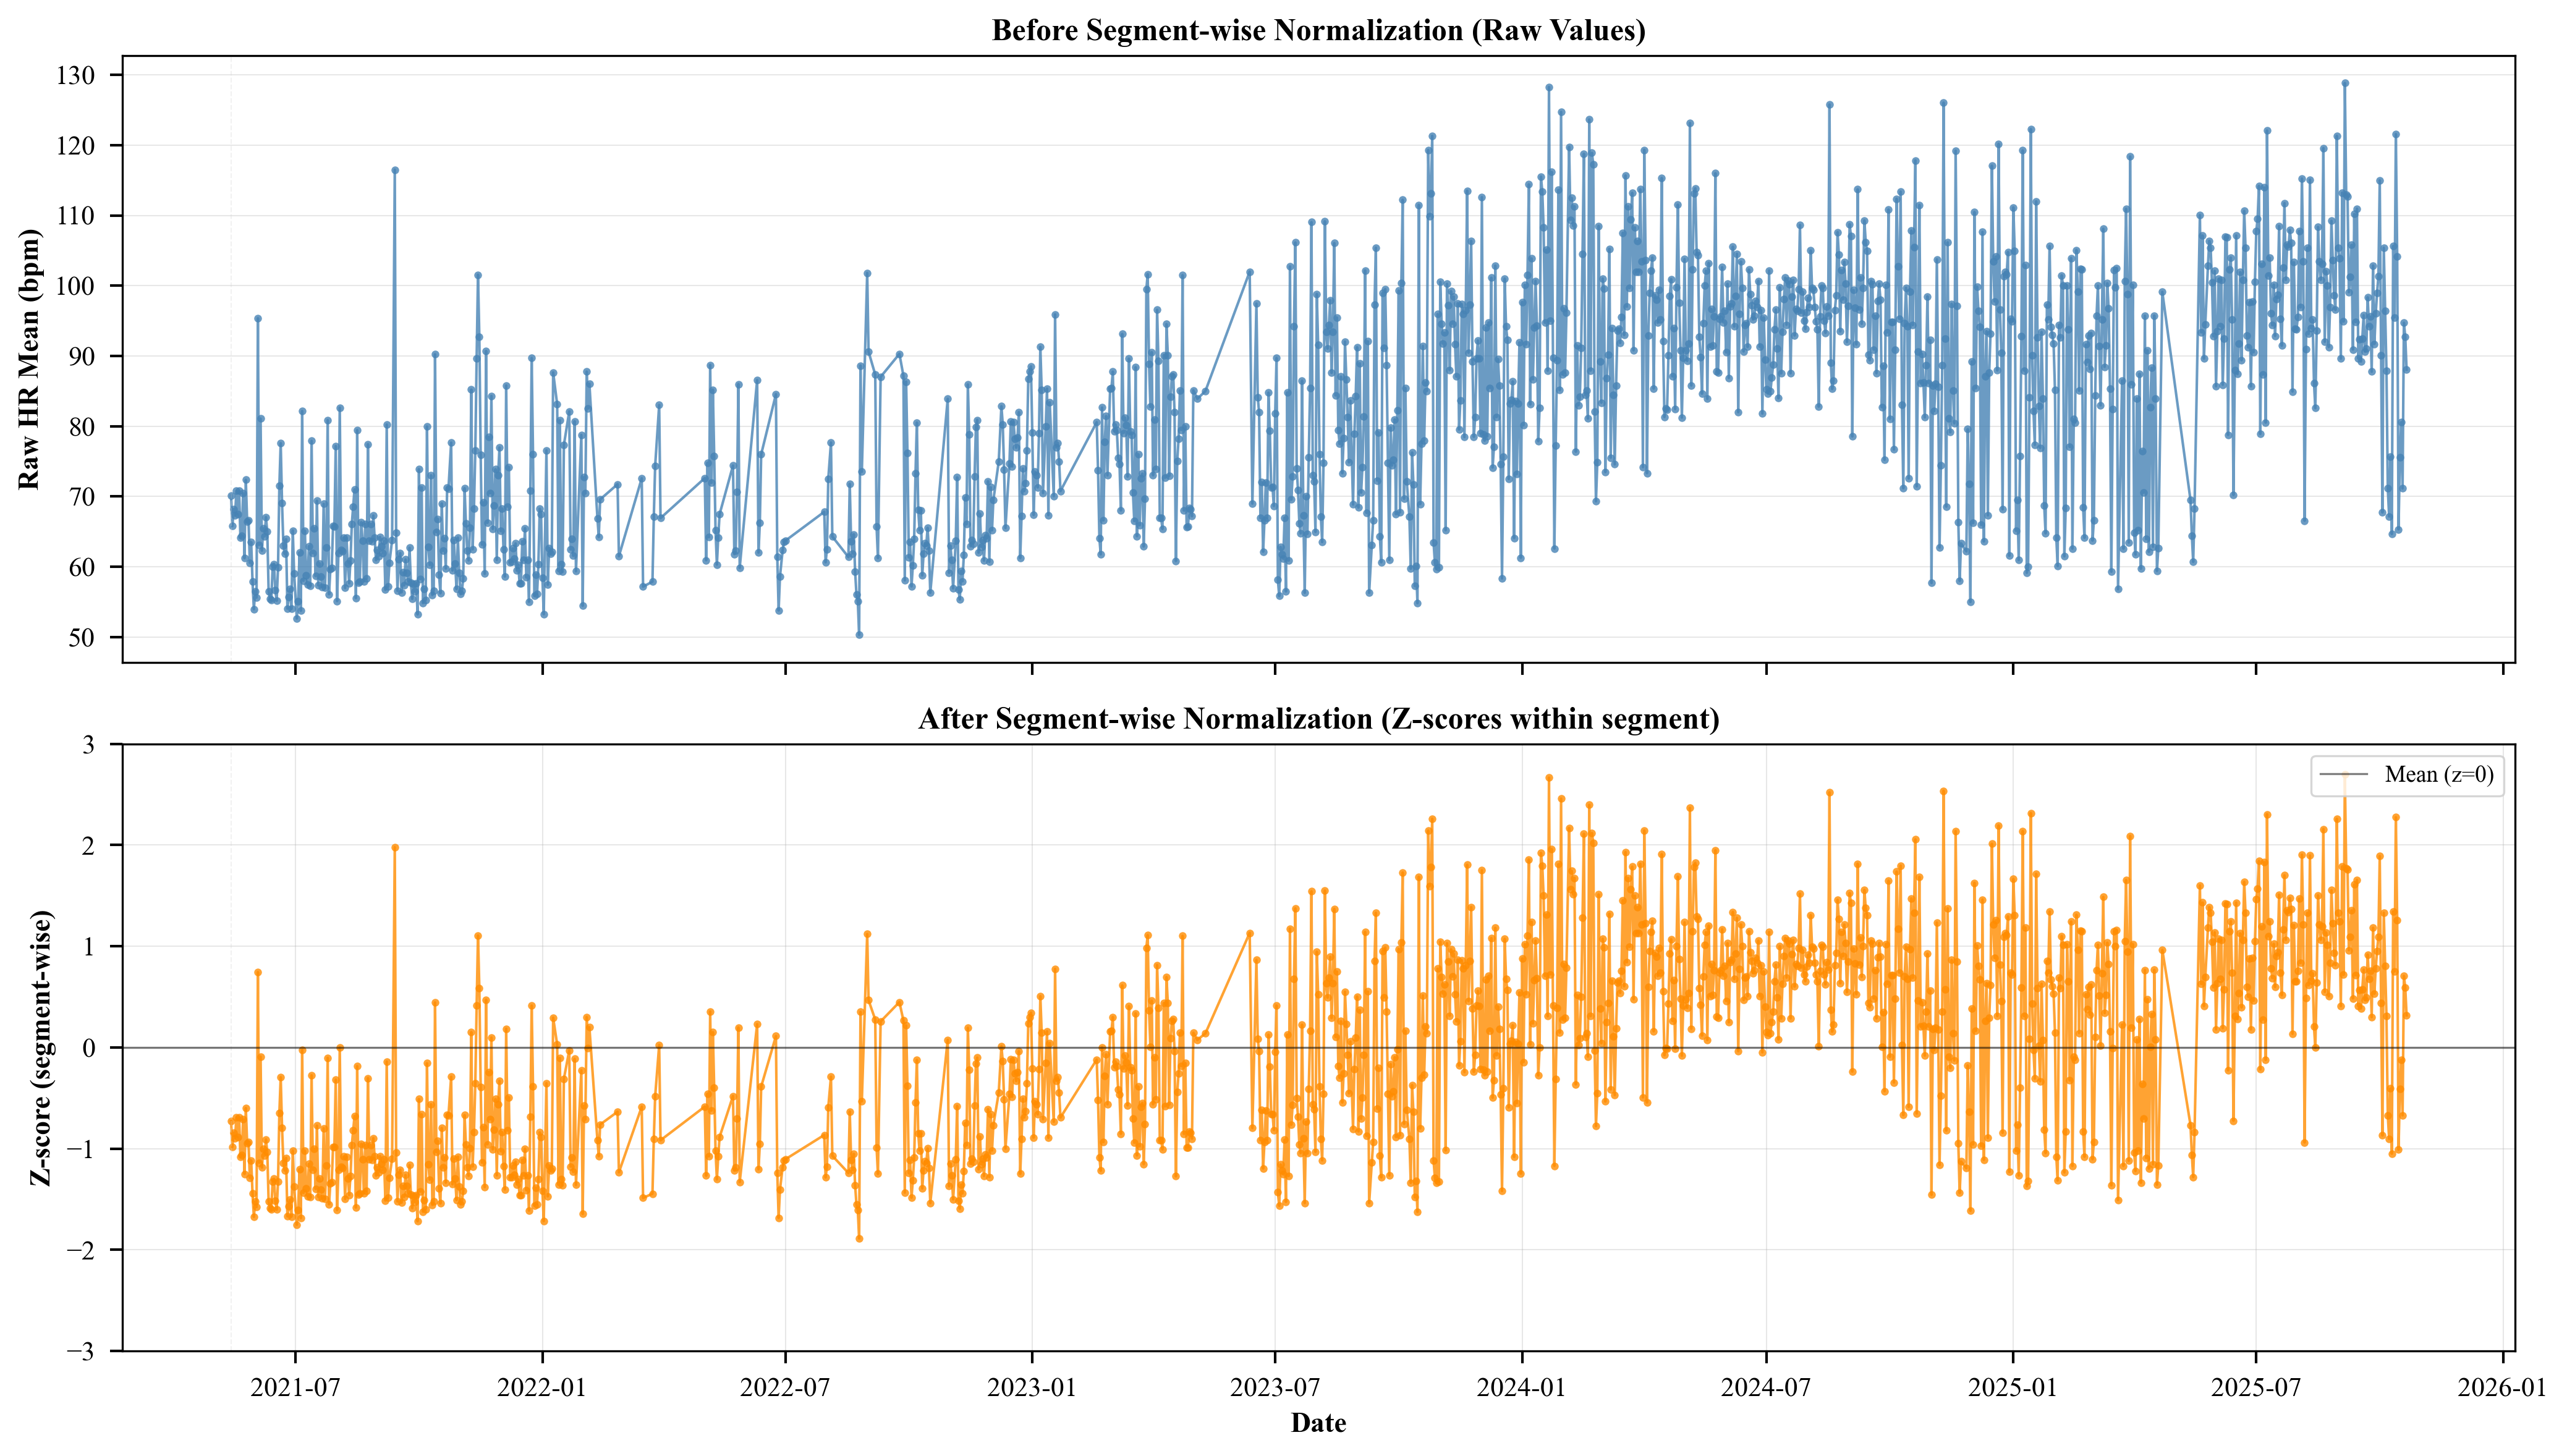

✓ Figure 4 saved: fig04_segmentwise_normalization.{pdf,png}
  - Top panel: hr_mean (raw values, n=1315 days)
  - Bottom panel: z_hr_mean (z-scores, ylim=[-3, 3])
  - Segment boundaries: 1 visual markers


In [ ]:
# ============================================================
# FIG_04: Segment Boundaries & Normalization
# ============================================================

feature_raw = 'hr_mean'
feature_zscore = 'z_hr_mean'

# Filter data with both raw and normalized values
demo_data = df[df[feature_raw].notna() & df[feature_zscore].notna() & df['segment_id'].notna()].copy()
demo_data = demo_data.sort_values('date')

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Top panel: Raw HR mean (BEFORE normalization)
ax1 = axes[0]
ax1.plot(demo_data['date'], demo_data[feature_raw], 
         marker='o', markersize=3, linewidth=1.0, alpha=0.8, color='steelblue')

# Add subtle segment boundaries
segment_changes = demo_data[demo_data['segment_id'] != demo_data['segment_id'].shift()]['date']
for seg_date in segment_changes:
    ax1.axvline(x=seg_date, color='red', linestyle='--', linewidth=1.0, alpha=0.6)

ax1.set_ylabel('Raw HR Mean (bpm)', fontsize=11, fontweight='bold')
ax1.set_title('Before Segment-wise Normalization (Raw Values)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Bottom panel: Z-scored HR mean (AFTER normalization)
ax2 = axes[1]
ax2.plot(demo_data['date'], demo_data[feature_zscore], 
         marker='o', markersize=3, linewidth=1.0, alpha=0.8, color='darkorange')

# Add segment boundaries
for seg_date in segment_changes:
    ax2.axvline(x=seg_date, color='red', linestyle='--', linewidth=1.0, alpha=0.6)

ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5, label='Mean (z=0)')
ax2.set_xlabel('Date', fontsize=11, fontweight='bold')
ax2.set_ylabel('Z-score (segment-wise)', fontsize=11, fontweight='bold')
ax2.set_title('After Segment-wise Normalization (Z-scores within segment)', fontsize=12, fontweight='bold')
ax2.set_ylim(-3, 3)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.savefig(FIG_DIR / 'FIG_04_segment_boundaries.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'FIG_04_segment_boundaries.png', bbox_inches='tight')
plt.show()

print("✓ FIG_04_segment_boundaries.{pdf,png} saved")
print(f"  - Segment boundaries: {len(segment_changes)} markers (red dashed lines)")
print(f"  - Days with data: {len(demo_data)}")

## FIG_05: Vendor Selection Heatmap (Apple vs Zepp)

Shows which data source (Apple Watch vs Zepp/Amazfit) was selected for each day.
Implements TODO #5: Deterministic vendor selection visualization.

In [ ]:
# ============================================================
# FIG_05: Vendor Selection Heatmap (Apple vs Zepp)
# TODO #5: Implements deterministic vendor selection visualization
# ============================================================

# Detect vendor based on available columns
df_vendor = df.copy()

# Check for Apple data (apple_hr_mean) and Zepp data (zepp_hr_mean or hr_mean from zepp)
has_apple = 'apple_hr_mean' in df.columns
has_zepp = 'zepp_hr_mean' in df.columns or 'hr_mean' in df.columns

# Create vendor indicator
if has_apple:
    df_vendor['has_apple'] = df_vendor['apple_hr_mean'].notna().astype(int)
else:
    df_vendor['has_apple'] = 0
    
if has_zepp and 'zepp_hr_mean' in df.columns:
    df_vendor['has_zepp'] = df_vendor['zepp_hr_mean'].notna().astype(int)
elif 'hr_mean' in df.columns:
    # Assume hr_mean is from zepp after cutover
    df_vendor['has_zepp'] = df_vendor['hr_mean'].notna().astype(int)
else:
    df_vendor['has_zepp'] = 0

# Determine selected vendor (Apple preferred when both available)
df_vendor['vendor_selected'] = 'None'
df_vendor.loc[df_vendor['has_apple'] == 1, 'vendor_selected'] = 'Apple'
df_vendor.loc[(df_vendor['has_apple'] == 0) & (df_vendor['has_zepp'] == 1), 'vendor_selected'] = 'Zepp'

# Detect cutover date (first day with Zepp but no Apple)
cutover_mask = (df_vendor['has_zepp'] == 1) & (df_vendor['has_apple'] == 0)
if cutover_mask.any():
    cutover_date = df_vendor.loc[cutover_mask, 'date'].min()
    print(f"✓ Cutover detected: {cutover_date.strftime('%Y-%m-%d')}")
    print(f"  (First day with Zepp data and no Apple data)")
else:
    cutover_date = None
    print("⚠ No cutover detected - single vendor dataset")

# Create visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 6))

# Top: Timeline of vendor selection
ax1 = axes[0]
vendor_colors = {'Apple': '#1f77b4', 'Zepp': '#ff7f0e', 'None': '#d3d3d3'}
for vendor in ['Apple', 'Zepp', 'None']:
    mask = df_vendor['vendor_selected'] == vendor
    if mask.any():
        ax1.scatter(df_vendor.loc[mask, 'date'], [vendor]*mask.sum(), 
                   c=vendor_colors[vendor], s=5, alpha=0.7, label=vendor)

if cutover_date:
    ax1.axvline(x=cutover_date, color='red', linestyle='--', linewidth=2, 
               label=f'Cutover: {cutover_date.strftime("%Y-%m-%d")}')

ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Data Source', fontsize=10)
ax1.set_title('Vendor Selection Timeline (Apple Watch → Zepp/Amazfit)', fontsize=12, fontweight='bold')
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3, axis='x')

# Bottom: Monthly coverage by vendor
df_vendor['year_month'] = df_vendor['date'].dt.to_period('M')
monthly_vendor = df_vendor.groupby('year_month').agg({
    'has_apple': 'sum',
    'has_zepp': 'sum'
}).reset_index()
monthly_vendor['year_month'] = monthly_vendor['year_month'].dt.to_timestamp()

ax2 = axes[1]
width = 15  # days
ax2.bar(monthly_vendor['year_month'], monthly_vendor['has_apple'], 
       width=width, label='Apple', color='#1f77b4', alpha=0.7)
ax2.bar(monthly_vendor['year_month'], monthly_vendor['has_zepp'], 
       width=width, bottom=monthly_vendor['has_apple'], 
       label='Zepp', color='#ff7f0e', alpha=0.7)

if cutover_date:
    ax2.axvline(x=cutover_date, color='red', linestyle='--', linewidth=2)

ax2.set_xlabel('Month', fontsize=10)
ax2.set_ylabel('Days with Data', fontsize=10)
ax2.set_title('Monthly Data Coverage by Vendor', fontsize=11, fontweight='bold')
ax2.legend(loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(FIG_DIR / 'FIG_05_vendor_heatmap.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'FIG_05_vendor_heatmap.png', bbox_inches='tight')
plt.show()

# Save vendor matrix CSV
vendor_summary = df_vendor[['date', 'has_apple', 'has_zepp', 'vendor_selected']].copy()
vendor_summary.to_csv(FIG_DIR / 'vendor_matrix.csv', index=False)

print("✓ FIG_05_vendor_heatmap.{pdf,png} saved")
print("✓ vendor_matrix.csv saved")
print(f"  - Apple days: {df_vendor['has_apple'].sum()}")
print(f"  - Zepp days: {df_vendor['has_zepp'].sum()}")

## FIG_06: MICE Imputation Summary

Shows missing data percentages before and after MICE imputation.
Implements TODO #8: MICE Imputation Figure.

In [ ]:
# ============================================================
# FIG_06: MICE Imputation Summary
# TODO #8: Implements MICE imputation visualization
# ============================================================

# Get ML6 feature file (post-MICE)
ml6_file = AI_DIR / 'ml6' / 'features_daily_ml6.csv'
if ml6_file.exists():
    df_ml6 = pd.read_csv(ml6_file, parse_dates=['date'])
else:
    df_ml6 = df.copy()
    print("⚠ ML6 features not found, using raw data for comparison")

# Define key feature columns for comparison
feature_cols = [
    'sleep_hours', 'sleep_quality_score',
    'hr_mean', 'hr_min', 'hr_max', 'hr_std', 'hr_samples',
    'hrv_sdnn_mean', 'hrv_sdnn_median', 'hrv_sdnn_min', 'hrv_sdnn_max', 'n_hrv_sdnn',
    'total_steps', 'total_distance', 'total_active_energy'
]

# Filter to available columns
available_cols = [c for c in feature_cols if c in df.columns]
available_cols_ml6 = [c for c in feature_cols if c in df_ml6.columns]

# Calculate missing before (raw) and after (ML6)
missing_before = {}
missing_after = {}

for col in available_cols:
    if col in df.columns:
        missing_before[col] = df[col].isna().sum()
    if col in df_ml6.columns:
        missing_after[col] = df_ml6[col].isna().sum()

# Create comparison dataframe
mice_summary = pd.DataFrame({
    'Feature': list(missing_before.keys()),
    'Missing_Before': list(missing_before.values()),
    'Missing_After': [missing_after.get(k, 0) for k in missing_before.keys()]
})
mice_summary['Imputed'] = mice_summary['Missing_Before'] - mice_summary['Missing_After']
mice_summary['Pct_Before'] = (mice_summary['Missing_Before'] / len(df) * 100).round(1)
mice_summary['Pct_After'] = (mice_summary['Missing_After'] / len(df) * 100).round(1)

# Sort by missing before (descending)
mice_summary = mice_summary.sort_values('Missing_Before', ascending=False)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Before vs After bar chart
ax1 = axes[0]
x = np.arange(len(mice_summary))
width = 0.35

bars1 = ax1.barh(x - width/2, mice_summary['Missing_Before'], width, 
                 label='Before MICE', color='#d62728', alpha=0.7, edgecolor='black')
bars2 = ax1.barh(x + width/2, mice_summary['Missing_After'], width,
                 label='After MICE', color='#2ca02c', alpha=0.7, edgecolor='black')

ax1.set_yticks(x)
ax1.set_yticklabels(mice_summary['Feature'], fontsize=9)
ax1.set_xlabel('Missing Values (count)', fontsize=10)
ax1.set_title('Missing Data: Before vs After MICE Imputation', fontsize=12, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3, axis='x')
ax1.invert_yaxis()

# Right: Summary statistics
ax2 = axes[1]
ax2.axis('off')

total_before = mice_summary['Missing_Before'].sum()
total_after = mice_summary['Missing_After'].sum()
total_imputed = mice_summary['Imputed'].sum()
total_cells = len(df) * len(available_cols)

summary_text = f"""
MICE Imputation Summary
{'='*40}

Total cells in feature matrix: {total_cells:,}
Missing values BEFORE MICE:    {total_before:,} ({total_before/total_cells*100:.1f}%)
Missing values AFTER MICE:     {total_after:,} ({total_after/total_cells*100:.1f}%)
Values imputed:                {total_imputed:,}

Top features with missing data (before):
"""

for _, row in mice_summary.head(5).iterrows():
    summary_text += f"  • {row['Feature']}: {row['Missing_Before']:,} ({row['Pct_Before']}%)\n"

summary_text += f"""
Remaining missing after MICE: {total_after:,} ({total_after/total_cells*100:.1f}% of matrix)
"""

ax2.text(0.1, 0.95, summary_text, transform=ax2.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(FIG_DIR / 'FIG_06_MICE_summary.pdf', bbox_inches='tight')
plt.savefig(FIG_DIR / 'FIG_06_MICE_summary.png', bbox_inches='tight')
plt.show()

# Save CSV summary
mice_summary.to_csv(FIG_DIR / 'missing_values_summary.csv', index=False)

print("✓ FIG_06_MICE_summary.{pdf,png} saved")
print("✓ missing_values_summary.csv saved")
print(f"  - Total imputed: {total_imputed:,} values")
print(f"  - Remaining missing: {total_after:,} ({total_after/total_cells*100:.1f}%)")

## FIG_07: ML Model Performance Comparison

Implements TODO #2: Model comparison with ML6-Extended and ML7-Extended results.
RandomForest highlighted as champion model.

In [ ]:
# ============================================================
# FIG_07: ML Model Performance Comparison
# TODO #2: Includes ML6-Extended AND ML7-Extended results
# ============================================================

# Load ML6-Extended results
ml6_ext_path = AI_DIR / 'ml6_extended' / 'per_model_metrics.json'
ml7_ext_path = AI_DIR / 'ml7_extended' / 'per_model_metrics.json'

all_models = []
all_f1 = []
all_kappa = []
all_type = []

# Load ML6-Extended
if ml6_ext_path.exists():
    with open(ml6_ext_path) as f:
        ml6_results = json.load(f)
    for model_name, data in ml6_results.items():
        if data.get('status') == 'success':
            all_models.append(model_name)
            all_f1.append(data['metrics'].get('mean_f1_macro', 0))
            all_kappa.append(data['metrics'].get('mean_cohen_kappa', 0))
            all_type.append('ML6-Extended')
    print(f"✓ Loaded {len([t for t in all_type if t=='ML6-Extended'])} ML6-Extended models")

# Load ML7-Extended
if ml7_ext_path.exists():
    with open(ml7_ext_path) as f:
        ml7_results = json.load(f)
    for model_name, data in ml7_results.items():
        if data.get('status') == 'success':
            all_models.append(f"{model_name} (DL)")
            all_f1.append(data['metrics'].get('mean_f1_macro', 0))
            kappa = data['metrics'].get('mean_cohen_kappa', 0)
            all_kappa.append(kappa if not np.isnan(kappa) else 0)
            all_type.append('ML7-Extended')
    print(f"✓ Loaded {len([t for t in all_type if t=='ML7-Extended'])} ML7-Extended models")

if all_models:
    # Sort by F1 descending
    sorted_idx = np.argsort(all_f1)[::-1]
    models = [all_models[i] for i in sorted_idx]
    f1_scores = [all_f1[i] for i in sorted_idx]
    kappa_scores = [all_kappa[i] for i in sorted_idx]
    model_types = [all_type[i] for i in sorted_idx]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Color bars by type, champion highlighted
    colors = []
    for i, (model, mtype) in enumerate(zip(models, model_types)):
        if i == 0:  # Champion
            colors.append('#1f77b4')  # Dark blue
        elif mtype == 'ML7-Extended':
            colors.append('#ff7f0e')  # Orange for DL
        else:
            colors.append('#7f7f7f')  # Gray for other ML6
    
    bars = ax.barh(range(len(models)), f1_scores, color=colors, edgecolor='black', linewidth=0.8)
    
    # Annotate bars
    for i, (bar, f1, kappa) in enumerate(zip(bars, f1_scores, kappa_scores)):
        ax.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height()/2, 
                f'{f1:.3f}', va='center', ha='right', fontsize=9, 
                color='white', fontweight='bold')
        if not np.isnan(kappa) and kappa != 0:
            ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                    f'κ={kappa:+.3f}', va='center', ha='left', fontsize=8, color='gray')
    
    ax.set_yticks(range(len(models)))
    ax.set_yticklabels(models, fontsize=10)
    ax.set_xlabel('F1-macro Score', fontsize=11, fontweight='bold')
    ax.set_title('Model Performance Comparison: ML6-Extended + ML7-Extended\n'
                 '(n=77 SoM days, 6-fold temporal CV, FS-B features)', fontsize=12, fontweight='bold')
    ax.set_xlim(0, 0.65)
    ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
    ax.invert_yaxis()
    ax.grid(True, alpha=0.3, axis='x')
    
    # Legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#1f77b4', edgecolor='black', label='Champion (RandomForest)'),
        Patch(facecolor='#7f7f7f', edgecolor='black', label='ML6-Extended (Classical)'),
        Patch(facecolor='#ff7f0e', edgecolor='black', label='ML7-Extended (Deep Learning)')
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=9)
    
    # Champion annotation
    ax.annotate('CHAMPION', xy=(f1_scores[0], 0), xytext=(f1_scores[0]+0.05, 1),
               arrowprops=dict(arrowstyle='->', color='#1f77b4', lw=1.5),
               fontsize=10, color='#1f77b4', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(FIG_DIR / 'FIG_07_model_comparison.pdf', bbox_inches='tight')
    plt.savefig(FIG_DIR / 'FIG_07_model_comparison.png', bbox_inches='tight')
    plt.show()
    
    print("✓ FIG_07_model_comparison.{pdf,png} saved")
    print(f"  Champion: {models[0]} (F1={f1_scores[0]:.4f})")
    print(f"  Total models compared: {len(models)}")
else:
    print("⚠ No model results found. Run ML6/ML7-Extended first.")

## FIG_08: HRV Sleep vs Awake Distribution

Exploratory analysis comparing HRV distributions during sleep and awake periods.
Implements TODO #7: HRV sleep vs awake figure.

In [ ]:
# ============================================================
# FIG_08: HRV Sleep vs Awake Distribution
# TODO #7: Implements HRV sleep vs awake figure
# ============================================================

# Check for HRV columns (try different naming conventions)
hrv_sleep_col = None
hrv_awake_col = None

# Look for sleep HRV
for col in ['hrv_sdnn_sleep', 'apple_hrv_sleep', 'hrv_sleep_mean']:
    if col in df.columns:
        hrv_sleep_col = col
        break

# Look for awake HRV
for col in ['hrv_sdnn_awake', 'apple_hrv_awake', 'hrv_awake_mean', 'hrv_sdnn_mean', 'apple_hrv_rmssd']:
    if col in df.columns:
        hrv_awake_col = col
        break

# If specific columns not found, use general HRV and approximate
if hrv_sleep_col is None and hrv_awake_col is None:
    # Try to use available HRV data
    if 'hrv_sdnn_mean' in df.columns:
        hrv_data = df['hrv_sdnn_mean'].dropna()
        print(f"Using hrv_sdnn_mean (n={len(hrv_data)} days)")
        
        fig, ax = plt.subplots(figsize=(10, 5))
        
        # Since we don't have sleep/awake split, show HRV distribution with label split
        for label in [-1, 0, 1]:
            mask = (df['label_3cls'] == label) & df['hrv_sdnn_mean'].notna()
            data = df.loc[mask, 'hrv_sdnn_mean']
            if len(data) > 0:
                ax.hist(data, bins=20, alpha=0.5, label=f'{LABEL_NAMES[label]} (n={len(data)})', 
                       color=COLOR_MAP[label], edgecolor='black', linewidth=0.5)
        
        ax.set_xlabel('HRV SDNN (ms)', fontsize=11)
        ax.set_ylabel('Frequency', fontsize=11)
        ax.set_title('HRV Distribution by Behavioral Label\n(Sleep/Awake split unavailable)', 
                    fontsize=12, fontweight='bold')
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(FIG_DIR / 'FIG_08_HRV_sleep_awake.pdf', bbox_inches='tight')
        plt.savefig(FIG_DIR / 'FIG_08_HRV_sleep_awake.png', bbox_inches='tight')
        plt.show()
        
        print("✓ FIG_08_HRV_sleep_awake.{pdf,png} saved")
        print("  ⚠ Note: Sleep/awake HRV split not available in current dataset")
        print("  → Showing HRV distribution by behavioral label instead")
    else:
        print("⚠ No HRV data available for FIG_08")
        print("  Skipping HRV sleep vs awake figure")
else:
    # We have sleep/awake HRV columns
    hrv_sleep = df[hrv_sleep_col].dropna() if hrv_sleep_col else pd.Series()
    hrv_awake = df[hrv_awake_col].dropna() if hrv_awake_col else pd.Series()
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    if len(hrv_sleep) > 0:
        ax.hist(hrv_sleep, bins=30, alpha=0.6, label=f'Sleep HRV (n={len(hrv_sleep)})', 
               color='#2ca02c', edgecolor='black', linewidth=0.5)
    if len(hrv_awake) > 0:
        ax.hist(hrv_awake, bins=30, alpha=0.6, label=f'Awake HRV (n={len(hrv_awake)})', 
               color='#d62728', edgecolor='black', linewidth=0.5)
    
    ax.set_xlabel('HRV (ms)', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title('HRV Distribution: Sleep vs Awake', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(FIG_DIR / 'FIG_08_HRV_sleep_awake.pdf', bbox_inches='tight')
    plt.savefig(FIG_DIR / 'FIG_08_HRV_sleep_awake.png', bbox_inches='tight')
    plt.show()
    
    print("✓ FIG_08_HRV_sleep_awake.{pdf,png} saved")
    print(f"  Sleep HRV: {len(hrv_sleep)} days")
    print(f"  Awake HRV: {len(hrv_awake)} days")

## FIG_09: Data Gaps Visualization

Shows natural gaps (>1 day) in the dataset timeline.
Implements TODO #9: Automatic gap segmentation visualization.

In [ ]:
# ============================================================
# FIG_09: Data Gaps Visualization
# ============================================================
# Identifies and visualizes natural gaps (>1 day) in the data

try:
    # Load daily summary data for gap analysis
    # Prefer using the enriched dataset with all features
    gap_df = daily_df.copy() if 'daily_df' in dir() else None
    
    if gap_df is None:
        # Try loading from enriched_per_day
        enriched_path = DATA_DIR / "enriched_per_day.parquet"
        if enriched_path.exists():
            gap_df = pd.read_parquet(enriched_path)
        else:
            raise FileNotFoundError("No suitable data for gap analysis")
    
    # Ensure date column
    if 'date' not in gap_df.columns and gap_df.index.name == 'date':
        gap_df = gap_df.reset_index()
    
    # Sort by date and calculate gaps
    gap_df = gap_df.sort_values('date')
    gap_df['date_dt'] = pd.to_datetime(gap_df['date'])
    gap_df['day_diff'] = gap_df['date_dt'].diff().dt.days
    
    # Find gaps > 1 day
    gap_threshold = 1
    gaps = gap_df[gap_df['day_diff'] > gap_threshold].copy()
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(14, 4))
    
    # Plot data availability as a horizontal bar
    dates = gap_df['date_dt'].values
    min_date, max_date = dates.min(), dates.max()
    
    # Draw continuous segments
    segment_starts = [min_date]
    segment_ends = []
    
    for idx, row in gaps.iterrows():
        gap_start = gap_df.loc[idx - 1, 'date_dt'] if idx > 0 else row['date_dt'] - pd.Timedelta(days=row['day_diff'])
        gap_end = row['date_dt']
        segment_ends.append(gap_start)
        segment_starts.append(gap_end)
    segment_ends.append(max_date)
    
    # Draw segments as horizontal bars
    for i, (start, end) in enumerate(zip(segment_starts, segment_ends)):
        ax.barh(0, (end - start).days, left=mdates.date2num(start), 
                height=0.5, color='steelblue', alpha=0.7, edgecolor='navy')
        
        # Add segment label
        mid = start + (end - start) / 2
        duration = (end - start).days
        if duration > 30:  # Only label segments > 30 days
            ax.text(mdates.date2num(mid), 0, f'{duration}d', 
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')
    
    # Mark gaps with red vertical spans
    for idx, row in gaps.iterrows():
        gap_start = gap_df.loc[idx - 1, 'date_dt'] if idx > 0 else row['date_dt'] - pd.Timedelta(days=row['day_diff'])
        gap_end = row['date_dt']
        gap_days = row['day_diff']
        
        # Draw gap marker
        ax.axvspan(mdates.date2num(gap_start), mdates.date2num(gap_end), 
                   alpha=0.3, color='red', zorder=5)
        
        # Label gap
        mid = gap_start + (gap_end - gap_start) / 2
        if gap_days > 3:  # Only label gaps > 3 days
            ax.text(mdates.date2num(mid), 0.4, f'{gap_days}d gap', 
                    ha='center', va='bottom', fontsize=8, color='darkred', rotation=90)
    
    # Formatting
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.xticks(rotation=45, ha='right')
    
    ax.set_ylim(-0.5, 1.5)
    ax.set_yticks([])
    ax.set_xlabel('Date', fontsize=12)
    ax.set_title(f'FIG_09: Data Availability Timeline with Gaps (threshold > {gap_threshold} day)', fontsize=14)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='steelblue', alpha=0.7, edgecolor='navy', label='Data available'),
        Patch(facecolor='red', alpha=0.3, label='Gap (>1 day)')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10)
    
    # Add summary text
    total_days = (max_date - min_date).days
    data_days = len(gap_df)
    n_gaps = len(gaps)
    total_gap_days = gaps['day_diff'].sum() - n_gaps  # Subtract n_gaps because day_diff includes the end day
    
    summary_text = f"Period: {pd.Timestamp(min_date).strftime('%Y-%m-%d')} to {pd.Timestamp(max_date).strftime('%Y-%m-%d')}\n"
    summary_text += f"Total span: {total_days} days | Data points: {data_days} | Gaps (>{gap_threshold}d): {n_gaps}"
    ax.text(0.02, 0.95, summary_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    
    # Save figure
    fig_path = FIG_DIR / "FIG_09_gaps_timeline.png"
    fig.savefig(fig_path, dpi=200, bbox_inches='tight')
    fig.savefig(FIG_DIR / "FIG_09_gaps_timeline.pdf", bbox_inches='tight')
    print(f"✓ Saved: {fig_path}")
    
    # Export gaps summary to CSV
    if len(gaps) > 0:
        gaps_export = gaps[['date', 'day_diff']].copy()
        gaps_export.columns = ['gap_end_date', 'gap_days']
        gaps_csv = FIG_DIR / "gaps_summary.csv"
        gaps_export.to_csv(gaps_csv, index=False)
        print(f"✓ Exported: {gaps_csv}")
    
    plt.show()
    
except Exception as e:
    print(f"⚠ FIG_09 generation failed: {e}")
    import traceback
    traceback.print_exc()

## FIG_10: Feature Catalogue (Appendix D)

Comprehensive catalogue of ALL features used in the study.
Implements TODO #4: Update feature catalogue with feature types, sources, and descriptions.

In [ ]:
# ============================================================
# FIG_10: Feature Catalogue (Appendix D)
# ============================================================
# Comprehensive catalogue of ALL features in the study

# Define the complete feature catalogue
feature_catalogue = [
    # Sleep features (from Apple Health + Zepp)
    {"category": "Sleep", "feature": "bed_duration_hr", "source": "Apple Health / Zepp", "unit": "hours", "description": "Total time in bed"},
    {"category": "Sleep", "feature": "core_duration_hr", "source": "Apple Health", "unit": "hours", "description": "Core sleep duration (Apple only)"},
    {"category": "Sleep", "feature": "deep_duration_hr", "source": "Apple Health / Zepp", "unit": "hours", "description": "Deep sleep duration"},
    {"category": "Sleep", "feature": "rem_duration_hr", "source": "Apple Health / Zepp", "unit": "hours", "description": "REM sleep duration"},
    {"category": "Sleep", "feature": "awake_duration_hr", "source": "Apple Health / Zepp", "unit": "hours", "description": "Awake time during sleep period"},
    {"category": "Sleep", "feature": "asleep_duration_hr", "source": "Apple Health / Zepp", "unit": "hours", "description": "Total asleep time (deep + rem + core/light)"},
    {"category": "Sleep", "feature": "sleep_efficiency", "source": "Derived", "unit": "ratio", "description": "asleep_duration / bed_duration"},
    {"category": "Sleep", "feature": "sleep_start_hour", "source": "Apple Health / Zepp", "unit": "hour (0-24)", "description": "Hour when sleep session started"},
    {"category": "Sleep", "feature": "sleep_end_hour", "source": "Apple Health / Zepp", "unit": "hour (0-24)", "description": "Hour when sleep session ended"},
    
    # Cardiovascular/HRV features
    {"category": "Cardiovascular", "feature": "hr_min", "source": "Apple Health / Zepp", "unit": "bpm", "description": "Minimum heart rate"},
    {"category": "Cardiovascular", "feature": "hr_max", "source": "Apple Health / Zepp", "unit": "bpm", "description": "Maximum heart rate"},
    {"category": "Cardiovascular", "feature": "hr_mean", "source": "Apple Health / Zepp", "unit": "bpm", "description": "Mean heart rate"},
    {"category": "Cardiovascular", "feature": "hr_std", "source": "Apple Health / Zepp", "unit": "bpm", "description": "Heart rate standard deviation"},
    {"category": "Cardiovascular", "feature": "resting_hr", "source": "Apple Health / Zepp", "unit": "bpm", "description": "Resting heart rate"},
    {"category": "Cardiovascular", "feature": "hrv_mean", "source": "Apple Health / Zepp", "unit": "ms", "description": "Mean HRV (SDNN)"},
    {"category": "Cardiovascular", "feature": "hrv_min", "source": "Apple Health / Zepp", "unit": "ms", "description": "Minimum HRV value"},
    {"category": "Cardiovascular", "feature": "hrv_max", "source": "Apple Health / Zepp", "unit": "ms", "description": "Maximum HRV value"},
    {"category": "Cardiovascular", "feature": "hrv_std", "source": "Apple Health / Zepp", "unit": "ms", "description": "HRV standard deviation"},
    {"category": "Cardiovascular", "feature": "hrv_sleep_mean", "source": "Apple Health / Zepp", "unit": "ms", "description": "Mean HRV during sleep"},
    {"category": "Cardiovascular", "feature": "hrv_awake_mean", "source": "Apple Health / Zepp", "unit": "ms", "description": "Mean HRV during wake"},
    
    # Activity features
    {"category": "Activity", "feature": "steps", "source": "Apple Health / Zepp", "unit": "count", "description": "Daily step count"},
    {"category": "Activity", "feature": "active_energy_kcal", "source": "Apple Health / Zepp", "unit": "kcal", "description": "Active energy burned"},
    {"category": "Activity", "feature": "distance_km", "source": "Apple Health / Zepp", "unit": "km", "description": "Distance walked/run"},
    {"category": "Activity", "feature": "exercise_minutes", "source": "Apple Health / Zepp", "unit": "minutes", "description": "Exercise/workout duration"},
    {"category": "Activity", "feature": "stand_hours", "source": "Apple Health", "unit": "hours", "description": "Hours with standing activity (Apple only)"},
    
    # Medication features
    {"category": "Medication", "feature": "med_ritalin_mg", "source": "Manual logs", "unit": "mg", "description": "Ritalin (methylphenidate) dosage"},
    {"category": "Medication", "feature": "med_venvanse_mg", "source": "Manual logs", "unit": "mg", "description": "Venvanse (lisdexamfetamine) dosage"},
    {"category": "Medication", "feature": "med_any_stimulant", "source": "Derived", "unit": "binary", "description": "Any stimulant medication taken"},
    
    # Auxiliary features (not model input)
    {"category": "Auxiliary", "feature": "pbsi_score", "source": "Self-report", "unit": "0-100", "description": "Perceived Bipolar Stability Index (NOT used as model input)"},
    {"category": "Auxiliary", "feature": "vendor", "source": "ETL", "unit": "categorical", "description": "Data source vendor (apple/zepp)"},
    
    # Target variables
    {"category": "Target", "feature": "som_label", "source": "Self-report (SoM)", "unit": "categorical", "description": "State of Mind label (hypo/stable/depressed)"},
    {"category": "Target", "feature": "som_binary", "source": "Derived", "unit": "binary", "description": "Unstable (1) vs Stable (0)"},
]

# Create DataFrame
catalogue_df = pd.DataFrame(feature_catalogue)

# Display as styled table
print("=" * 80)
print("FEATURE CATALOGUE - Appendix D")
print("=" * 80)
print(f"\nTotal features: {len(catalogue_df)}")
print(f"Categories: {catalogue_df['category'].nunique()}")
print()

# Group by category
for cat in catalogue_df['category'].unique():
    cat_df = catalogue_df[catalogue_df['category'] == cat]
    print(f"\n{'─' * 40}")
    print(f"📁 {cat.upper()} ({len(cat_df)} features)")
    print(f"{'─' * 40}")
    for _, row in cat_df.iterrows():
        print(f"  • {row['feature']:<25} [{row['unit']:<12}] - {row['description']}")

# Export to CSV
catalogue_csv = FIG_DIR / "catalogue_features_table.csv"
catalogue_df.to_csv(catalogue_csv, index=False)
print(f"\n✓ Exported: {catalogue_csv}")

# Create visual figure
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')

# Create summary by category
category_counts = catalogue_df.groupby('category').size().reset_index(name='count')
category_counts = category_counts.sort_values('count', ascending=True)

# Bar chart of feature counts by category
fig2, ax2 = plt.subplots(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(category_counts)))
bars = ax2.barh(category_counts['category'], category_counts['count'], color=colors, edgecolor='black')

# Add count labels
for bar, count in zip(bars, category_counts['count']):
    ax2.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             str(count), va='center', fontsize=11, fontweight='bold')

ax2.set_xlabel('Number of Features', fontsize=12)
ax2.set_title('FIG_10: Feature Catalogue Summary by Category', fontsize=14, fontweight='bold')
ax2.set_xlim(0, category_counts['count'].max() * 1.2)

# Add total annotation
total = catalogue_df.shape[0]
ax2.text(0.98, 0.02, f'Total: {total} features', transform=ax2.transAxes,
         fontsize=12, ha='right', va='bottom',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()

# Save figure
fig_path = FIG_DIR / "FIG_10_feature_catalogue.png"
fig2.savefig(fig_path, dpi=200, bbox_inches='tight')
fig2.savefig(FIG_DIR / "FIG_10_feature_catalogue.pdf", bbox_inches='tight')
print(f"✓ Saved: {fig_path}")

plt.close(fig)
plt.show()

## Summary: All Generated Figures

Final summary of all dissertation figures and auxiliary exports.

In [ ]:
# ============================================================
# SUMMARY: All Generated Figures
# ============================================================

print("=" * 80)
print("PhD DISSERTATION FIGURES GENERATION COMPLETE")
print("=" * 80)
print(f"\nParticipant: {PARTICIPANT}")
print(f"Snapshot: {SNAPSHOT}")
print(f"\nOutput directory: {FIG_DIR.absolute()}")

# List all generated figures
print(f"\n{'─' * 80}")
print("GENERATED FIGURES (FIG_XX_<name>.png/pdf):")
print(f"{'─' * 80}")

figure_mapping = """
  FIG_03_PBSI_timeline.png       → Chapter 4: Methods - PBSI Overview
  FIG_04_segment_boundaries.png  → Chapter 4: Methods - Preprocessing 
  FIG_05_vendor_heatmap.png      → Chapter 5: EDA - Data Source Selection
  FIG_06_MICE_summary.png        → Chapter 5: EDA - Imputation Strategy
  FIG_07_model_comparison.png    → Chapter 6: Results - Model Performance
  FIG_08_HRV_sleep_awake.png     → Chapter 5: EDA - HRV Analysis
  FIG_09_gaps_timeline.png       → Chapter 5: EDA - Data Quality/Gaps
  FIG_10_feature_catalogue.png   → Appendix D: Feature Catalogue
"""
print(figure_mapping)

# Count actual files
png_files = list(FIG_DIR.glob('FIG_*.png'))
pdf_files = list(FIG_DIR.glob('FIG_*.pdf'))

print(f"{'─' * 80}")
print("FILE INVENTORY:")
print(f"{'─' * 80}")
for f in sorted(png_files):
    size_kb = f.stat().st_size / 1024
    print(f"  ✓ {f.name:<35} ({size_kb:.1f} KB)")

print(f"\nTotal PNG files: {len(png_files)}")
print(f"Total PDF files: {len(pdf_files)}")

# List auxiliary CSV exports
print(f"\n{'─' * 80}")
print("AUXILIARY CSV EXPORTS:")
print(f"{'─' * 80}")
csv_files = list(FIG_DIR.glob('*.csv'))
for f in sorted(csv_files):
    print(f"  ✓ {f.name}")

print(f"\nTotal CSV files: {len(csv_files)}")

# LaTeX usage hint
print(f"\n{'─' * 80}")
print("LATEX USAGE:")
print(f"{'─' * 80}")
print(r"""
\begin{figure}[htbp]
    \centering
    \includegraphics[width=\textwidth]{figures/FIG_07_model_comparison.pdf}
    \caption{Model Performance Comparison across ML6 and ML7-Extended approaches}
    \label{fig:model_comparison}
\end{figure}
""")

print("=" * 80)
print("✓ ALL FIGURES READY FOR DISSERTATION")
print("=" * 80)